In [1]:
using Revise, Plots, LinearAlgebra, LaTeXStrings, Random, Images

In [2]:
includet("../../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [3]:
domain = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

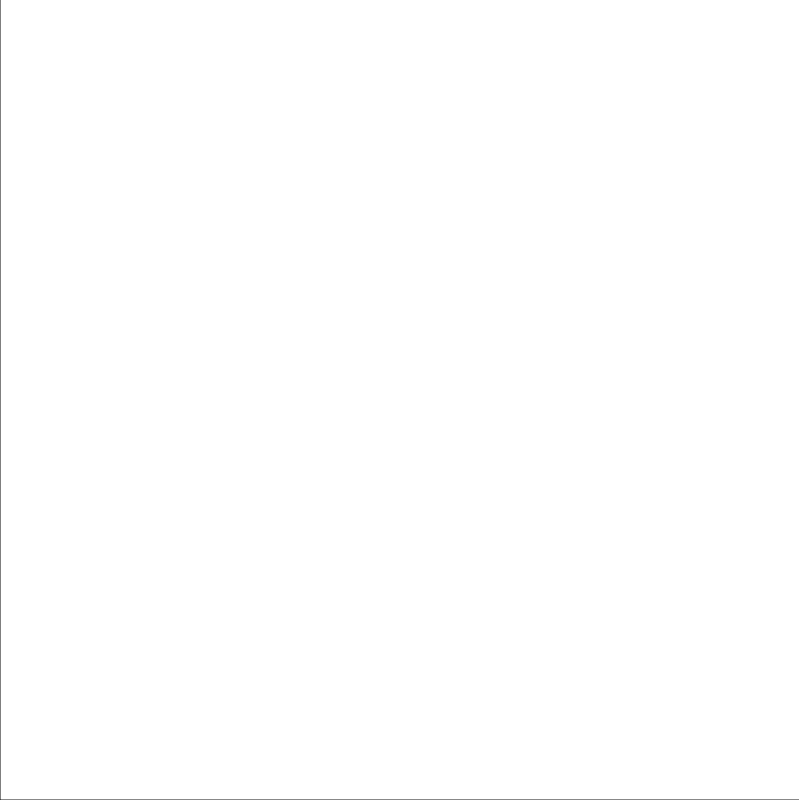

In [4]:
# Define the plot
num_points = 64

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / (num_points - 1) for j in 0:num_points-1, i in 0:num_points-1]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / (num_points - 1) for j in 0:num_points-1, i in 0:num_points-1]

grid = range(0, stop=1, length=num_points)
plot_size = (400, 400) .* 2

using Plots.Measures
plt = heatmap(xlims=domain[1], ylims=domain[2], color=:viridis, size=plot_size,
grid=false, colorbar=false, ticks=false, frame=false, margins=-2mm
)

# plt_gt = deepcopy(plt)
# plot_spikes!(plt_gt, μ0, label=L"μ_0", colorscheme=:viridis)

## Check $\sigma$ parameter

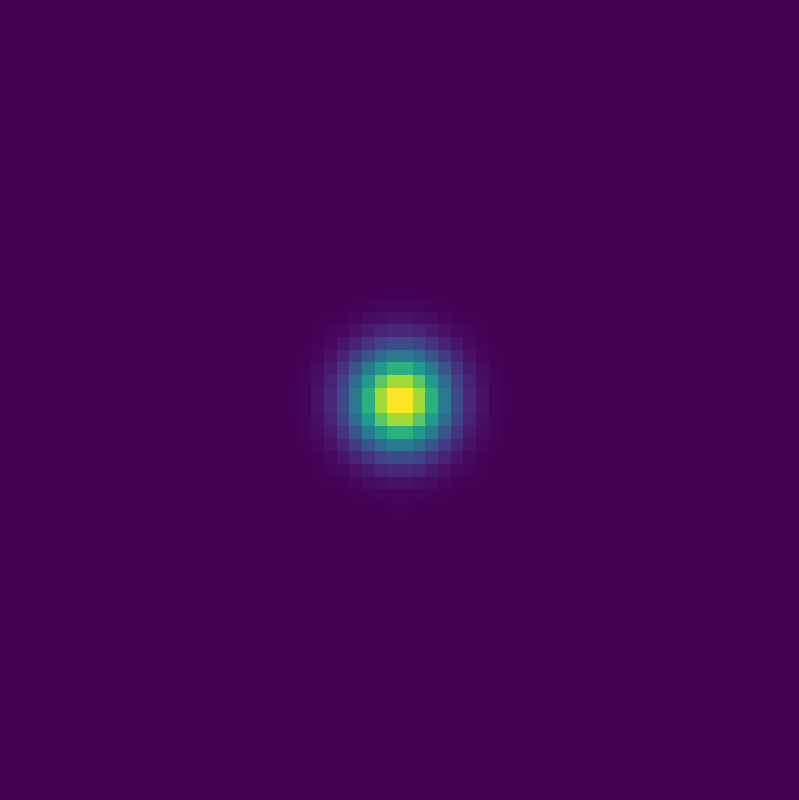

In [5]:
# const noise_mean = 0.0021172377176794793
const σ2 = let
    λ = 723.0 # Wavelength
    NA = 1.4 # Numerical aperture
    FWHM = λ / (2 * NA) # Full width at half maximum i.e. diffraction limit
    σ = FWHM / (2 * log(2.0))
    (σ / (64 * 100.0))^2
end
σ = sqrt(σ2)

ops = gaussian_operators_2D(σ, plt_grid_x1, plt_grid_x2)

plt_test_σ = deepcopy(plt)
heatmap!(plt_test_σ, grid, grid, ops.adjΦ(ops.Φ([0.5], [0.5], [1.0])), color=:viridis)

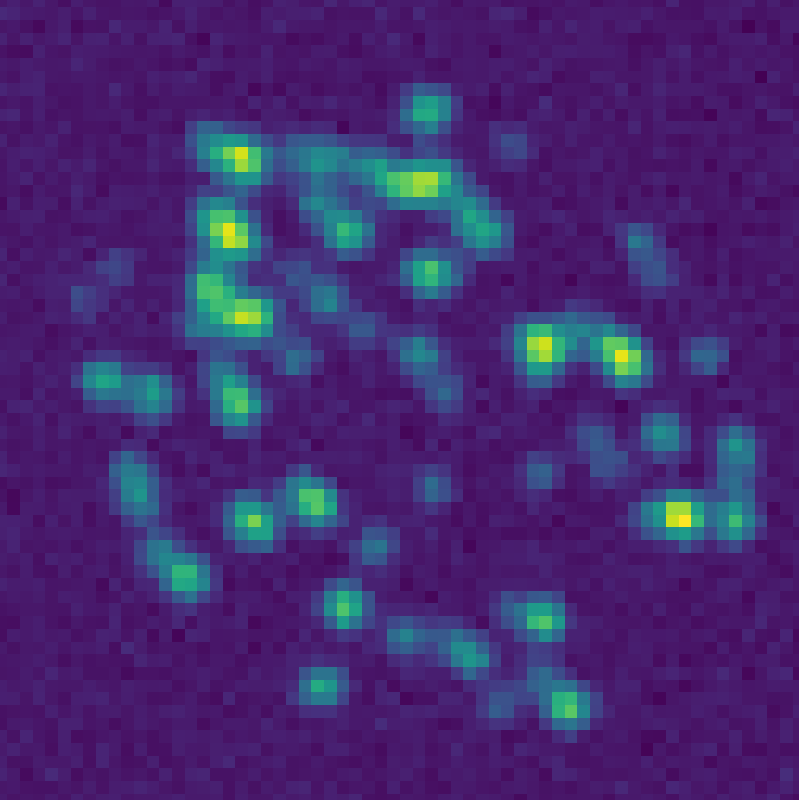

In [6]:
plt_obs = deepcopy(plt)

image = load("../../high_density/sequence/00001.tif")

y = channelview(image)
heatmap!(plt_obs, grid, grid, y ./ maximum(y), label="y_0", color=:viridis)

### SFW

In [7]:
λ = 0.0024 # Regularisation parameter
λ = 0.032 # Regularisation parameter
prob = BLASSO(vec(y), ops, domain, λ)

BLASSO(N0f16[0.00223N0f16, 0.00208N0f16, 0.0025N0f16, 0.00232N0f16, 0.0022N0f16, 0.00232N0f16, 0.00186N0f16, 0.00189N0f16, 0.00237N0f16, 0.00233N0f16  …  0.00204N0f16, 0.00177N0f16, 0.00235N0f16, 0.00198N0f16, 0.00189N0f16, 0.00192N0f16, 0.00159N0f16, 0.00229N0f16, 0.0022N0f16, 0.00209N0f16], Operators(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.015873015873015872; … ; 1.0 0.9841269841269841; 1.0 1.0], 590.3102629802514)), 4096), var"#Φ#33"{var"#ϕ#32"{Int64}, Int64}(var"#ϕ#32"{Int64}(Core.Box(var"#gauss2D#31"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.015873015873015872; … ; 1.0 0.9841269841269841; 1.0 1.0], 590.3102629802514)), 4096), Core.Box(var"#gauss2D#31"{Matrix{Float64}, Float64}(Core.Box(#= circular reference @-2 =#), [0.0 0.0; 0.0 0.015873015873015872; … ; 1.0 0.9841269841269841; 1.0 1.0], 590.3102629802514)), 4096), var"#adjΦ#38"{Matrix{Float64}, Matrix{Flo

In [ ]:
solve!(prob, :SFW, options=Dict(:maxits => 60))#50))

prob.μ

SFW iterations:  88%|███████████████████████████████    |  ETA: 0:02:48

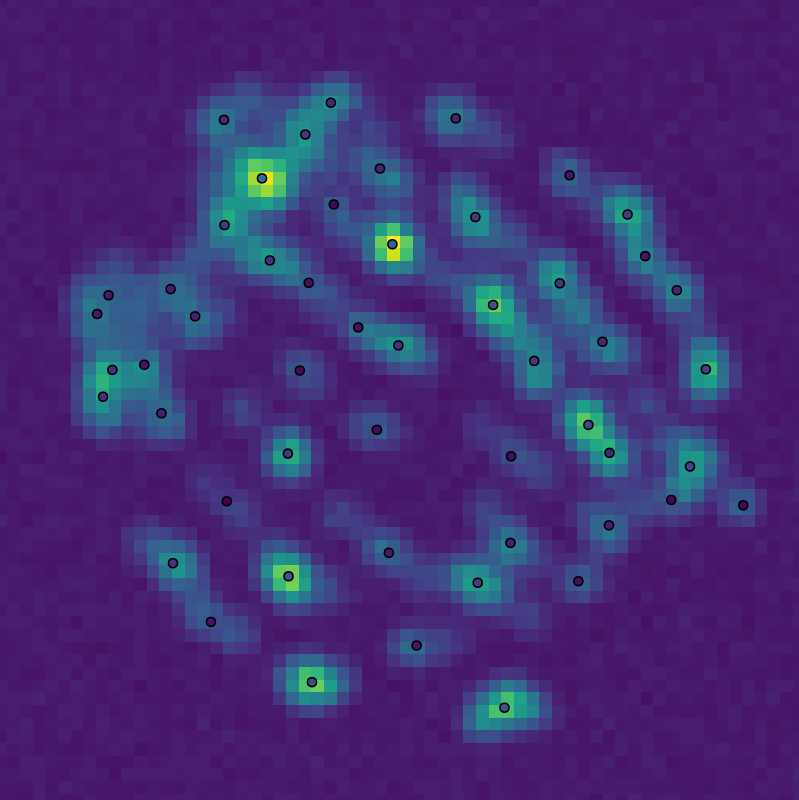

In [31]:
plt_sfw = deepcopy(plt_obs)

plot_spikes!(plt_sfw, prob.μ, colorscheme=:viridis, marker=:circle, markersize=5, markerstrokewidth=1)
plot!(colorbar=false)

In [262]:
solve!(prob, :BSFW, options=Dict(:maxits => 60))

prob.μ

DiscreteMeasure([[0.28557391127290255, 0.29289412142967586, 0.8505380574139689, 0.5295164927468372, 0.6860725140027353, 0.2818790453614976, 0.7782746022011113, 0.2931906220604078, 0.31575943639443516, 0.4268665228135997  …  0.8891098420409629, 0.46902212571540847, 0.1127928472214823, 0.12273444306483122, 0.4472086301303806, 0.6720525266965492, 0.6201406354567998, 0.475479127487282, 0.5608555846585079, 0.3780777467813382], [0.61437597037975, 0.8012910031703742, 0.3551589282327408, 0.7715629830143671, 0.5677250858517369, 0.7078296459697655, 0.5563227534123402, 0.5037684875125974, 0.3501515199206996, 0.7186221699711806  …  0.5586617458782698, 0.7870961148631129, 0.5304601640113509, 0.647550162699999, 0.5905162311937916, 0.4077498938505059, 0.12852169328973873, 0.31937009345147277, 0.5055331937394667, 0.550059331099213]], [0.21433700675108763, 0.15013646173332781, 0.1430038624261182, 0.14910297293951624, 0.15502895775617961, 0.16358184159200032, 0.13838798409691982, 0.11019537433079944, 0.

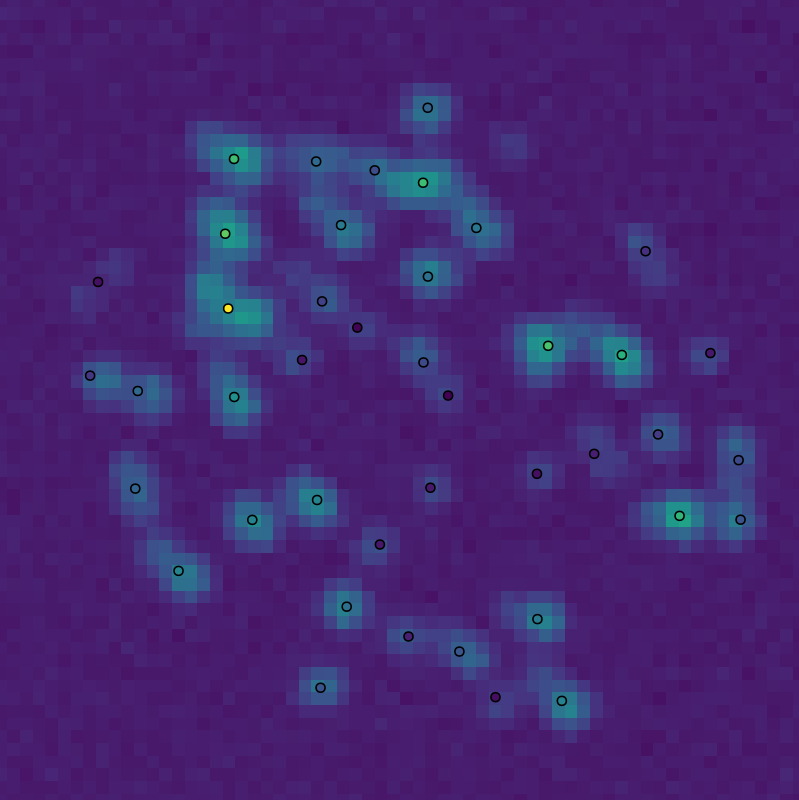

In [263]:
plt_sfw = deepcopy(plt_obs)

plot_spikes!(plt_sfw, prob.μ, colorscheme=:viridis, marker=:circle, markersize=5, markerstrokewidth=1)
plot!(colorbar=false)

## Random frame

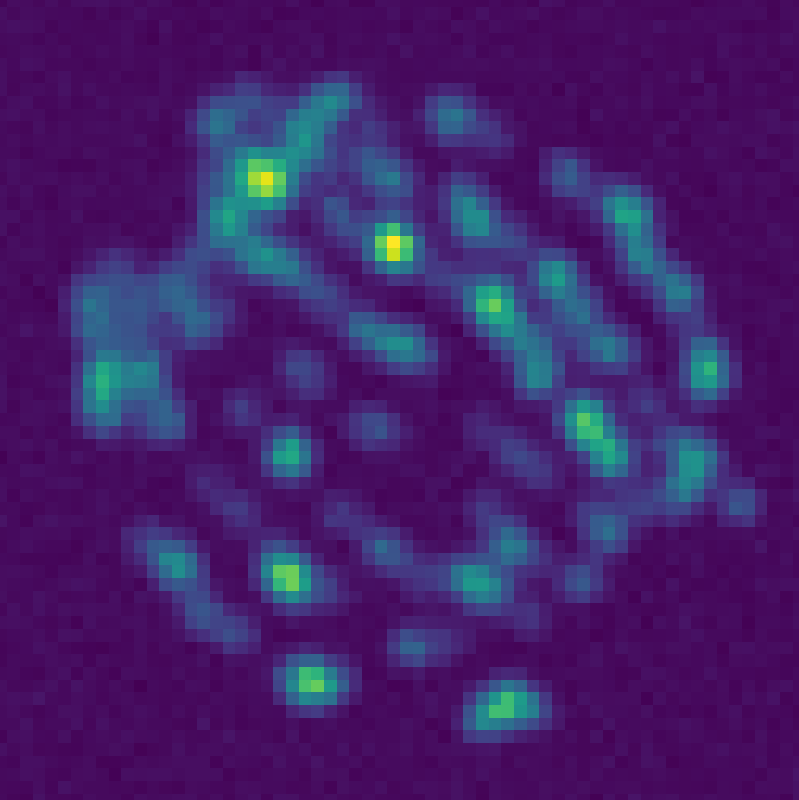

In [8]:
image = load("../../high_density/sequence/00267.tif")

y = channelview(image)
heatmap!(plt_obs, grid, grid, y ./ maximum(y), label="y_0", color=:viridis)

In [30]:
λ = 0.0025
prob = BLASSO(vec(y), ops, domain, λ)
solve!(prob, :SFW, options=Dict(:descent => :BFGS, :maxits => 58))

prob.μ

SFW iterations: 100%|███████████████████████████████████| Time: 0:03:21


DiscreteMeasure([[0.3278853775838856, 0.49107917283170793, 0.7364610705652263, 0.12898014820530726, 0.6171980413203235, 0.39041714894438984, 0.3821128931091418, 0.3611243411486186, 0.8636053079560813, 0.7854157689775639  …  0.9302658024264667, 0.4141141221392814, 0.21351802615118295, 0.7628468681264856, 0.2839035093065988, 0.13593080683691364, 0.8075471075212212, 0.38641090064529465, 0.8401328221713597, 0.1406300029596086], [0.7770397147147525, 0.6946693828284566, 0.46883469162557573, 0.5040922450093633, 0.6188066422047572, 0.14729069651820825, 0.8318398151381106, 0.2796440305558538, 0.41689710716606654, 0.731855030893481  …  0.3684141232252825, 0.8715850449267446, 0.6386341106044437, 0.43394886648150327, 0.3734231751956968, 0.6309351369033597, 0.6798464376738087, 0.6464826961397917, 0.3751571120856262, 0.5375881101472879]], [0.38759631870960765, 0.3252107105190182, 0.22213624694769693, 0.14223318475498792, 0.2652126476151165, 0.25697299420818387, 0.16447308550919004, 0.279237170189178

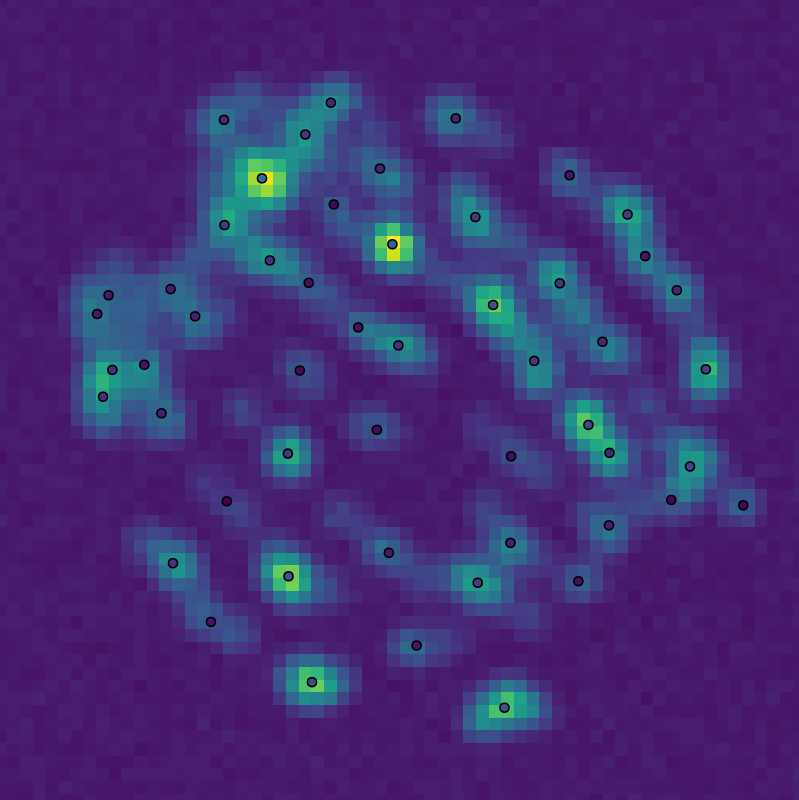

In [16]:
plt_sfw = deepcopy(plt_obs)
plot_spikes!(plt_sfw, prob.μ, colorscheme=:viridis, marker=:circle, markersize=5, markerstrokewidth=1)
plot!(colorbar=false)

In [35]:
maximum(y)

0.0248N0f16

In [34]:
maximum(prob.μ.a)

0.38759631870960765

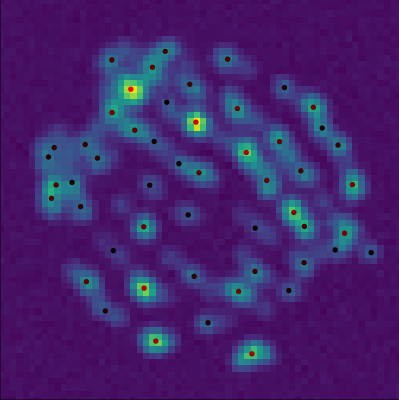

In [49]:
plt_sfw = deepcopy(plt_obs)

red_cmap = cgrad([RGB(0, 0, 0), RGB(1, 0, 0)])

amp = deepcopy(prob.μ.a)

amp .*= 40maximum(y) ./ maximum(prob.μ.a)

scatter!(plt_sfw,
    inset=(bbox(0, 0, 1, 1, :bottom)), bgcolor=:transparent,
    prob.μ.x...,
    zcolor=amp,
    color=red_cmap,
    legend=:none, grid=false, ticks=:none, ratio=:equal, cb=:none, size=(400, 400),
    marker=:circle,
    markersize=3, markerstrokewidth=0)

In [53]:
savefig(plt_sfw, "../../figures/SMLM_typical_frame_high_density.svg")

"c:\\Users\\ladis\\OneDrive - University of Warwick\\Year 4\\Super resolution\\Codes\\SparseSpikes\\figures\\SMLM_typical_frame_high_density.svg"

In [ ]:
# prob = BLASSO(Float64.(vec(y)), ops, domain, 0.0025)
# @time solve!(prob, :BSFW, options=Dict(:descent => :BFGS, :maxits => 100))

prob.μ

DiscreteMeasure([[0.32857134124991266, 0.4911230101525671, 0.7369106280991559, 0.1344573312582619, 0.6171366296632493, 0.39041883495150154, 0.3841894037955609, 0.36113873732872553, 0.2825268882267065, 0.8623513564873502  …  0.14279100300862915, 0.44410260714708494, 0.5974488413180934, 0.5976268428569766, 0.6389766563203216, 0.133109958983931, 0.24501612476161463, 0.1975147170159114, 0.39106268149668477, 0.8080591527074251], [0.7773829269337829, 0.6946408623317688, 0.4682651780264524, 0.5260765323835129, 0.6188999235497383, 0.147288980974134, 0.8419916491502958, 0.2796612987488151, 0.7103734916589353, 0.41392203912783393  …  0.6486227639740784, 0.35039479066113427, 0.27167509255192696, 0.27157244813338105, 0.32147513977648995, 0.5872681308841571, 0.6040499689632268, 0.633676156326723, 0.6419375152695675, 0.6793712083156809]], [0.3778591623593561, 0.32471403363838747, 0.22832799044122454, 0.18918308918031762, 0.22924989390010705, 0.25697425410707647, 0.13888988712850286, 0.27923834358835

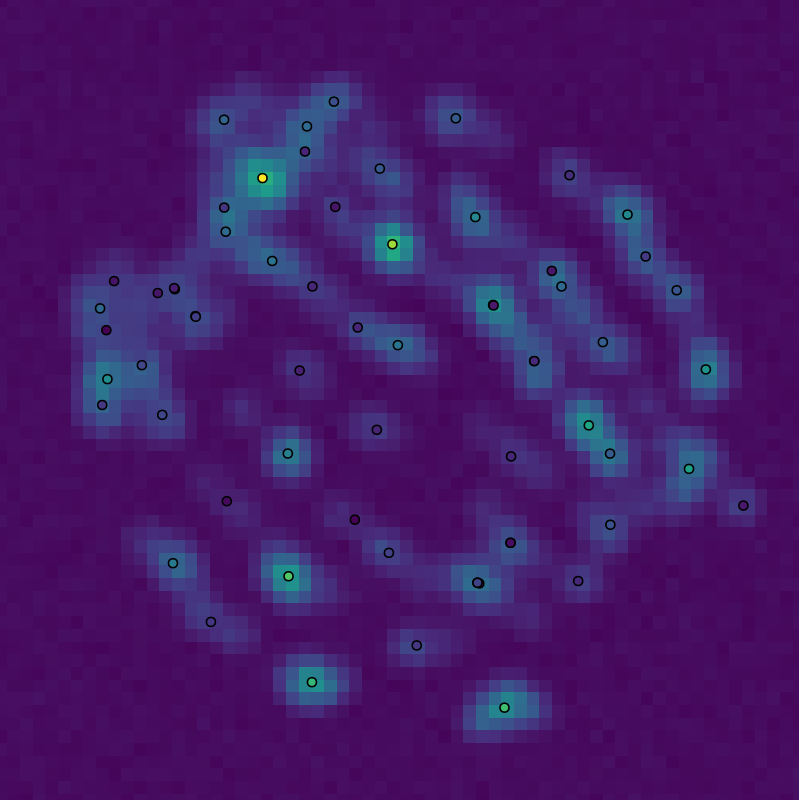

In [275]:
plt_sfw = deepcopy(plt_obs)

plot_spikes!(plt_sfw, prob.μ, colorscheme=:viridis, marker=:circle, markersize=5, markerstrokewidth=1)
plot!(colorbar=false)